# Let's start with basic imports

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandasql as sql

In [3]:
db = pd.read_excel('Resultats_EEG.xlsx')

In [4]:
display(db)

,report_id,report_title,practitioner_first_name,practitioner_last_name,started_at,duration,channels,sampling_rate,birthday,sex,...,average_circuit_hits_social,average_circuit_hits_technical,region_hits_circuit_hits,region_hits_regions,top_circuit_hits_hits,top_circuit_hits_circuits,sampled_data_sampling_rate,sampled_data_max_channel_data_amplitudes,sampled_data_max_channel_data_channels,sampled_data_max_channel_data_frequencies
0,cbf47f47-824f-47d9-986f-b78e88eb50fc,10 daily activities,Dario,Nardi,2023-05-29T14:00:38Z,1736000,"[""FP1"",""F3"",""C3"",""P3"",""O1"",""F7"",""T3"",""T5"",""FZ""...",256.0,NaN,NaN,...,7277,8354.667,"[7041,6564,9155,8216,9598,6939,7468,6702,8441,...","[""FP1"",""FP2"",""T3"",""F4"",""F8"",""C3"",""PZ"",""O2"",""O1...","[1706,1501,1109,921,768,665,614,597,597,597,59...","[""FP1:FP2"",""T3:F4:F8"",""C3:PZ"",""O2:PZ"",""O1:F8"",...",2,"[32.98,32.34,28.41,27.98,22.43,20.38,19.1,30.0...",NaN,"[2,1,2,3,2,3,2,6,6,2,2,2,2,1,2,3,4,3,4,2,2,7,2..."
1,62afa164-978d-4b42-90d1-1afc421afb00,10 Daily Activities,Darren,Yee,2024-07-03T18:21:35Z,2049000,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",256.0,Wed Sep 08 2004 00:00:00 GMT+0000 (Coordinated...,MALE,...,53488.668,54092.668,"[55178,54766,54751,52001,53173,53850,55464,525...","[""CP1"",""CP2"",""CP6"",""F7"",""F8"",""FC1"",""C3"",""FZ"",""...","[1619,1310,1010,715,711,678,670,669,553,532,51...","[""O2:PO8"",""O1:PO7"",""P7:PO7"",""FT10:T8"",""P8:PO8""...",2,"[11.752724,8.354612,5.470554,4.1701145,20.9850...","[""FP2"",""FP1"",""F4"",""FC6"",""FPZ"",""FPZ"",""F8"",""FPZ""...","[2,1,1,3,3,1,1,1,1,3,1,1,1,1,5,3,1,2,1,1,6,1,2..."
2,fb0d72c8-0acd-4d73-b7c3-0e5574d99b2c,10 daily activities,Dario,Nardi,2023-05-29T13:00:43Z,1719000,"[""FP1"",""F3"",""C3"",""P3"",""O1"",""F7"",""T3"",""T5"",""FZ""...",256.0,NaN,NaN,...,5305.75,7045,"[7831,7481,7422,8310,7879,8085,7238,5310,4947,...","[""T3"",""F8"",""P3"",""P4"",""O1"",""T5"",""T6"",""FP1"",""FP2...","[1288,1159,1043,979,979,850,850,696,696,631,59...","[""T3:F8"",""P3:P4"",""O1:P4"",""T5:T6"",""T3:T5"",""FP1:...",2,"[16.92,6.22,5.41,7.35,7.48,6.44,5.66,7.74,13.0...",NaN,"[2,3,8,4,2,3,3,4,2,2,2,2,4,2,2,12,11,7,4,5,2,5..."
3,9f64cf25-bf0c-4b1d-9581-2a7f0468eaa3,10 daily activities,Dario,Nardi,2023-08-30T04:37:56Z,2659000,"[""FP1"",""F3"",""C3"",""P3"",""O1"",""F7"",""T3"",""T5"",""FZ""...",256.0,NaN,NaN,...,10153.5,10576.667,"[10313,9178,10345,8867,9493,9837,10166,9950,11...","[""F8"",""T6"",""FP1"",""F3"",""C3"",""P3"",""O1"",""F7"",""T3""...","[1642,1412,1412,1363,1199,1034,690,673,673,657...","[""F8:T6"",""FP1:F3:C3:P3:O1:F7:T3:T5:FZ:FP2:F4:C...",2,"[21.57,13.7,18.13,14.35,6,2.68,3.32,1.56,2.87,...",NaN,"[2,5,3,2,2,6,2,1,6,2,3,4,2,4,2,2,2,3,4,4,4,3,3..."
4,df0523f8-04d4-4cd3-a811-2a8a83b1fbdf,Daily activities,Adrien,Mangeot,2024-04-14T06:23:25Z,2277000,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",128.0,Tue Nov 21 1967 00:00:00 GMT+0000 (Coordinated...,MALE,...,201.66667,302.5,"[42,42,35,128,371,40,522,503,366,3,2,36,3,18,2...","[""C3"",""CP5"",""FC5"",""FT9"",""PO7"",""C4"",""CP2"",""CP6""...","[88,28,25,23,21,20,18,15,14,14,10,10,9,8,8,7,7...","[""P8:PO8"",""CP2:CP6"",""CP2:PO8"",""CP2:CP6:P8:PO8""...",2,"[1.8225476,1.8392375,5.216371,7.9707336,6.8049...","[""FP2"",""CP6"",""F3"",""FP1"",""CZ"",""FT9"",""T8"",""FC6"",...","[8,14,11,9,10,9,12,12,11,8,10,10,14,9,12,18,19..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,695ce022-8d7e-4ce4-b21f-34ee0bbaf580,B��n��fices,Adrien,Mangeot,2024-10-03T21:44:20Z,2237000,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",128.0,NaN,NaN,...,53380.668,53685,"[52701,53470,52649,49869,51700,51897,54725,540...","[""CP2"",""F4"",""FC2"",""FP1"",""FPZ"",""FZ"",""T7"",""C3"",""...","[1974,1066,1056,780,720,701,651,631,623,605,56...","[""O1:PO7"",""O2:PO8"",""FP2:FPZ"",""C3:C4:CP1:CP2:CP...",2,"[11.699686,25.203989,47.11913,103.459404,19.92...","[""T8"",""FP1"",""FP1"",""FP1"",""FP

In [ ]:
#db.to_pickle('EEG_new.pkl')

# Trimming down the database
We need to trim down the database in order to keep only a certain kind of test (to not compare people writing with people doing sports, for example)

In [ ]:

request_col = "SELECT report_title, channels, hand_preference, mbti_type, analysis_version, frequency_bandwidths, executive_style, top_patterns, top_skills, average_circuit_hits_decision_making,average_circuit_hits_perception, average_circuit_hits_abstract, average_circuit_hits_concrete, average_circuit_hits_social, average_circuit_hits_technical, region_hits_circuit_hits, region_hits_regions, top_circuit_hits_hits, top_circuit_hits_circuits"
request_order = " ORDER BY channels"
request_where = ' WHERE channels = (SELECT channels FROM db GROUP BY channels ORDER BY COUNT(*) DESC LIMIT 1)'
#request_count = 

    
db_filtered = sql.sqldf(request_col + " FROM db" + request_where + request_order)




In [10]:
db_filtered = pd.read_pickle('EEG_col_utiles.pkl')
display(db_filtered)
#db_filtered.to_pickle('EEG_col_utiles.pkl')

,report_title,channels,hand_preference,mbti_type,analysis_version,frequency_bandwidths,executive_style,top_patterns,top_skills,average_circuit_hits_decision_making,average_circuit_hits_perception,average_circuit_hits_abstract,average_circuit_hits_concrete,average_circuit_hits_social,average_circuit_hits_technical,region_hits_circuit_hits,region_hits_regions,top_circuit_hits_hits,top_circuit_hits_circuits
0,10 Daily Activities,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",RIGHT,ISTJ,2001-02-01 00:00:00,"[""0.5:45""]",REFINER,"[""HALO"",""LEFT""]","[""O1"",""FT10"",""PO7"",""O2"",""PO8"",""FT9""]",49397,50246,53117.57,53160.285,53488.668,54092.668,"[55178,54766,54751,52001,53173,53850,55464,525...","[""CP1"",""CP2"",""CP6"",""F7"",""F8"",""FC1"",""C3"",""FZ"",""...","[1619,1310,1010,715,711,678,670,669,553,532,51...","[""O2:PO8"",""O1:PO7"",""P7:PO7"",""FT10:T8"",""P8:PO8""..."
1,Daily activities,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",LEFT,INTP,2001-02-01 00:00:00,"[""8:45""]",None,None,"[""PO8"",""P8"",""CP2"",""CP6"",""PO7"",""PZ""]",1,1,183.28572,111.42857,201.66667,302.5,"[42,42,35,128,371,40,522,503,366,3,2,36,3,18,2...","[""C3"",""CP5"",""FC5"",""FT9"",""PO7"",""C4"",""CP2"",""CP6""...","[88,28,25,23,21,20,18,15,14,14,10,10,9,8,8,7,7...","[""P8:PO8"",""CP2:CP6"",""CP2:PO8"",""CP2:CP6:P8:PO8""..."
2,Daily activities,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",LEFT,INTP,2001-02-01 00:00:00,"[""0.5:8""]",None,None,"[""PO7"",""FP2"",""O1"",""P7"",""FT9"",""T7""]",12377,12785,13357,13805.143,13747.667,13627,"[13684,13155,14219,14473,14565,13852,14397,137...","[""F8"",""FPZ"",""C3"",""C4"",""CP2"",""CP5"",""CP6"",""F4"",""...","[379,377,327,302,273,266,226,220,220,216,207,2...","[""FP2:FPZ"",""O1:PO7"",""O2:PO8"",""P7:PO7"",""P8:PO8""..."
3,10 Daily Activities,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",RIGHT,ESFP,2001-02-01 00:00:00,"[""8:45""]",CONNECTOR,"[""DIAMONDS"",""CENTER_BACK"",""BACK_LEFT""]","[""P7"",""PO7"",""T7"",""FC6"",""CP6"",""FC2""]",89,91,9266.714,26554.285,26102,28265.166,"[6122,26963,46990,37874,26753,24868,52091,2658...","[""FT9"",""P3"",""PO7"",""C3"",""CP1"",""CP2"",""CP5"",""CZ"",...","[2378,2175,1906,1596,1376,1340,1277,1156,1141,...","[""P7:PO7"",""T7:T8"",""FC2:FC6"",""P7:T7"",""PO7:T8"",""..."
4,Daily activities,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",LEFT,None,2001-02-01 00:00:00,"[""8:45""]",None,None,"[""CP6"",""P8"",""T8"",""CP5"",""FC5"",""T7""]",47,24,214.42857,227.28572,221.16667,249.33333,"[292,51,47,25,90,55,97,209,358,397,100,521,586...","[""F4"",""F8"",""FP1"",""FPZ"",""O1"",""P4"",""PO7"",""PO8"",""...","[59,56,39,35,21,18,16,13,11,10,10,10,10,8,8,8,...","[""CP6:P8"",""CP6:P8:T8"",""CP6:T8"",""P8:T8"",""CP5:CP..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,B��n��fices,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",None,None,2001-02-01 00:00:00,"[""0.5:45""]",CONNECTOR,"[""RIGHT"",""OPEN_ANALYTIC"",""CENTER_FRONT""]","[""PO7"",""FP2"",""T8"",""O1"",""FPZ"",""PO8""]",49869,52483,52956.715,53193,53380.668,53685,"[52701,53470,52649,49869,51700,51897,54725,540...","[""CP2"",""F4"",""FC2"",""FP1"",""FPZ"",""FZ"",""T7"",""C3"",""...","[1974,1066,1056,780,720,701,651,631,623,605,56...","[""O1:PO7"",""O2:PO8"",""FP2:FPZ"",""C3:C4:CP1:CP2:CP..."
778,Rentrer dans le sujet,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",RIGHT,None,2001-02-01 00:00:00,"[""0.5:45""]",ENERGIZER,"[""CENTER_FRONT"",""STRONG_STARBURST"",""OPEN_ANALY...","[""T7"",""FT10"",""T8"",""FT9"",""FC6"",""FP2""]",27820,28408,29929.285,30239,29879.834,29589.166,"[30954,30562,30410,30059,31725,30285,30104,307...","[""C3"",""C4"",""CP1"",""CP2"",""CP5"",""CZ"",""F4"",""F7"",""F...","[1073,869,493,427,339,338,292,286,270,270,264,...","[""FT10:T7"",""C3:C4:CP1:CP2:CP5:CP6:CZ:F3:F4:F7:..."
779,10 Daily Activities,"[""CZ"",""FZ

In [ ]:
db_f_activities = sql.sqldf("SELECT * FROM db_filtered WHERE LOWER(report_title) LIKE '%daily activities%'")
display(db_f_activities)

In [ ]:
#db_f_activities.to_pickle('EEG_casque_acti.pkl')

# Classification
Now that we have a database that is a bit more coherent, we can try and implement classification algorithms into it

In [6]:
db_f_activities = pd.read_pickle('db_exploitable.pkl')
display(db_f_activities)

,report_title,channels,hand_preference,mbti_type,analysis_version,frequency_bandwidths,executive_style,top_patterns,top_skills,average_circuit_hits_decision_making,average_circuit_hits_perception,average_circuit_hits_abstract,average_circuit_hits_concrete,average_circuit_hits_social,average_circuit_hits_technical,region_hits_circuit_hits,region_hits_regions,top_circuit_hits_hits,top_circuit_hits_circuits
0,10 Daily Activities,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",RIGHT,INTP,2001-02-01 00:00:00,"[""0.5:45""]",ENERGIZER,"[""STRONG_STARBURST"",""LEFT"",""CENTER_BACK""]","[""O1"",""PO7"",""P8"",""O2"",""CP6"",""PO8""]",53371,52832,55753.57,56380,55519.168,55362.168,"[57007,57152,56292,56591,57018,56339,56678,569...","[""C3"",""CP1"",""O1"",""O2"",""P4"",""PO8"",""C4"",""CP2"",""C...","[4585,1277,982,918,748,616,605,595,564,549,473...","[""C3:C4:CP1:CP2:CP5:CP6:CZ:F3:F4:F7:F8:FC1:FC2..."
1,Daily activities,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",LEFT,None,2001-02-01 00:00:00,"[""0.5:45""]",ENERGIZER,"[""STRONG_STARBURST"",""LEFT"",""HALO""]","[""O1"",""PO7"",""P7"",""FT9"",""T7"",""O2""]",49629,50031,54468.57,56234.855,55770,57082.832,"[53913,54661,49629,51002,55692,56936,57481,567...","[""F4"",""F8"",""FP1"",""FPZ"",""O1"",""P4"",""PO7"",""PO8"",""...","[1561,694,685,647,624,574,539,519,511,492,485,...","[""O1:PO7"",""O1:P7:PO7"",""FT10:FT9"",""P7:T7"",""P7:P..."
2,9 daily activities,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",RIGHT,INTP,2001-02-01 00:00:00,"[""0.5:45""]",REFINER,"[""CENTER_FRONT"",""CENTER_BACK"",""RIGHT""]","[""T8"",""PO8"",""P8"",""P7"",""O2"",""T7""]",37356,36689,47302.715,47486.285,47424.5,48528.668,"[47755,48280,47823,50311,46119,37356,49120,494...","[""C4"",""CZ"",""FC2"",""P4"",""F8"",""FP1"",""O1"",""PO7"",""P...","[1689,640,630,552,547,531,512,509,493,475,464,...","[""O2:PO8"",""CP6:P8"",""P8:PO8"",""CP5:P7"",""FC6:T8"",..."
3,10 daily activities,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",RIGHT,None,2001-02-01 00:00:00,"[""0.5:45""]",REFINER,"[""BACK"",""LEFT"",""CENTER_BACK""]","[""P7"",""PO7"",""P8"",""PO8"",""O1"",""FT9""]",35679,35881,36529.57,36580.855,36142,36649.332,"[37513,36812,37166,36201,36236,31689,33415,363...","[""C4"",""FC2"",""P4"",""FT9"",""O1"",""P7"",""P8"",""PO7"",""C...","[2658,1991,1641,1106,1075,682,513,508,504,504,...","[""P7:PO7"",""P8:PO8"",""O1:PO7"",""O1:P7:PO7"",""P7:P8..."
4,10 Daily Activities,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",RIGHT,INFJ,2001-02-01 00:00:00,"[""0.5:45""]",REFINER,"[""BACK"",""HALO"",""HIDDEN_STARBURST""]","[""O1"",""PO7"",""O2"",""PO8"",""P7"",""FT9""]",69148,67586,72367.86,73119.14,70975.164,72367.836,"[71292,68829,74352,72801,74012,73500,67784,731...","[""F7"",""O2"",""CP6"",""F3"",""FC1"",""FC5"",""FT9"",""FZ"",""...","[3680,1801,1665,1300,1041,861,776,707,668,650,...","[""O1:PO7"",""O2:PO8"",""O1:O2"",""P7:PO7"",""O1:P7:PO7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,10 Daily Activities,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",RIGHT,ENFP,2001-02-01 00:00:00,"[""0.5:45""]",ENERGIZER,"[""STRONG_STARBURST"",""RANDOM_FIELD"",""AUDIO_KINE...","[""T7"",""T8"",""O2"",""FT9"",""P7"",""PO8""]",47347,46986,49532.715,50133.145,48627.832,48541.168,"[49553,49877,49585,49912,51480,50945,50830,495...","[""CP2"",""CZ"",""FC2"",""C4"",""CP5"",""CP6"",""FC5"",""FT10...","[1531,1226,1064,736,680,672,648,610,565,550,51...","[""T7:T8"",""FT9:T7"",""O2:PO8"",""O2:T7"",""O2:T8"",""CP..."
123,10 Daily Activities,"[""CZ"",""FZ"",""FPZ"",""FP1"",""F7"",""F3"",""FC1"",""C3"",""F...",RIGHT,INTJ,2001-02-01 00:00:00,"[""0.5:45""]",REFINER,"[""LEFT"",""HALO"",""CENTER_FRONT""]","[""FT9"",""O1"",""PO7"",""P7"",""O2"",""T7""]",45026,46302,45751.855,49332.285,48061,48997.168,"[46438,48768,46033,48837,48755,27220,48370,466...","[""F8"",""FC6"",""O1"",""F7"",""FC2"",""FT9"",

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier
from pandasql import sqldf

In [20]:
# Step 1: Clean text columns
def clean_text_column(col):
    return col.apply(lambda x: ' '.join(x) if isinstance(x, list) else (str(x) if x is not None else '')).replace('', 'unknown')

db_f_activities['top_patterns'] = clean_text_column(db_f_activities['top_patterns'])
db_f_activities['top_skills'] = clean_text_column(db_f_activities['top_skills'])

# Step 2: Fix corrupted numeric columns (e.g., strings/dates in numeric columns)
# Convert to numeric safely
numeric_cols = [
    'average_circuit_hits_decision_making', 'average_circuit_hits_perception',
    'average_circuit_hits_abstract', 'average_circuit_hits_concrete',
    'average_circuit_hits_social', 'average_circuit_hits_technical'
]

for col in numeric_cols:
    db_f_activities[col] = pd.to_numeric(db_f_activities[col], errors='coerce')

# Step 3: Remove rows with NaN in any of the numeric columns
query = """
SELECT *
FROM db_f_activities
WHERE 
    average_circuit_hits_abstract IS NOT NULL AND
    average_circuit_hits_concrete IS NOT NULL AND
    average_circuit_hits_social IS NOT NULL AND
    average_circuit_hits_technical IS NOT NULL AND
    average_circuit_hits_decision_making IS NOT NULL AND
    average_circuit_hits_perception IS NOT NULL
"""
db_f_activities_clean = sqldf(query)

In [21]:
# Step 4: Separate labeled and unlabeled
labeled_df = db_f_activities_clean[db_f_activities_clean['mbti_type'].notnull()]
unlabeled_df = db_f_activities_clean[db_f_activities_clean['mbti_type'].isnull()]

# Step 5: Define preprocessing pipelines
text_pipeline = TfidfVectorizer()
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

preprocessor = ColumnTransformer([
    ('text1', text_pipeline, 'top_patterns'),
    ('text2', text_pipeline, 'top_skills'),
    #('num', num_pipeline, numeric_cols)
])

# Step 6: Prepare data
X_all = preprocessor.fit_transform(db_f_activities_clean)
y_all = db_f_activities_clean['mbti_type'].fillna(-1)

# Step 7: Train semi-supervised model
base_clf = RandomForestClassifier()
self_training_clf = SelfTrainingClassifier(base_clf)
self_training_clf.fit(X_all, y_all)

SelfTrainingClassifier(base_estimator=RandomForestClassifier())

# Using Leave-One-Out Cross-Validation

/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-

Classification Report:
              precision    recall  f1-score   support

        ENFJ       1.00      0.20      0.33         5
        ENFP       0.22      0.22      0.22         9
        ENTJ       0.12      0.14      0.13         7
        ENTP       0.00      0.00      0.00         5
        ESFJ       0.00      0.00      0.00         2
        ESFP       0.00      0.00      0.00         2
        ESTJ       0.00      0.00      0.00         5
        ESTP       0.00      0.00      0.00         4
        INFJ       0.18      0.33      0.24        12
        INFP       0.00      0.00      0.00         4
        INTJ       0.00      0.00      0.00         8
        INTP       0.33      0.22      0.27         9
        ISFJ       0.00      0.00      0.00         1
        ISFP       0.00      0.00      0.00         1
        ISTJ       0.17      0.20      0.18         5
        ISTP       0.00      0.00      0.00         3

    accuracy                           0.13        82
   

/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

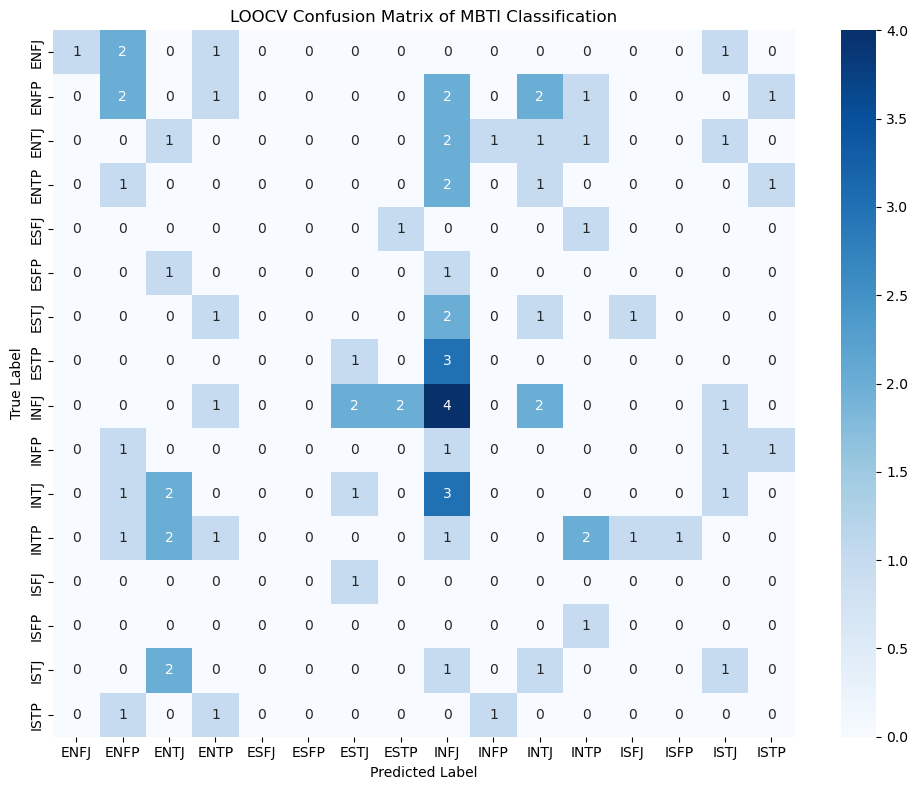

In [22]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loo = LeaveOneOut()
y_true = []
y_pred = []

# Only use labeled data for evaluation
X_labeled = preprocessor.fit_transform(labeled_df)
y_labeled = labeled_df['mbti_type'].values

# Loop over each split
for train_index, test_index in loo.split(X_labeled):
    X_train, X_test = X_labeled[train_index], X_labeled[test_index]
    y_train, y_test = y_labeled[train_index], y_labeled[test_index]
    
    # Train the classifier using Self-Training
    clf = SelfTrainingClassifier(RandomForestClassifier())
    clf.fit(X_train, y_train)
    
    # Predict on the test sample
    y_pred.append(clf.predict(X_test)[0])
    y_true.append(y_test[0])

# Final evaluation
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
labels = np.unique(y_labeled)
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('LOOCV Confusion Matrix of MBTI Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-

Average MBTI similarity score (0-1): 0.5548780487804879

Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.67      0.40      0.50         5
        ENFP       0.17      0.22      0.19         9
        ENTJ       0.12      0.14      0.13         7
        ENTP       0.00      0.00      0.00         5
        ESFJ       0.00      0.00      0.00         2
        ESFP       0.00      0.00      0.00         2
        ESTJ       0.00      0.00      0.00         5
        ESTP       0.00      0.00      0.00         4
        INFJ       0.19      0.33      0.24        12
        INFP       0.00      0.00      0.00         4
        INTJ       0.00      0.00      0.00         8
        INTP       0.20      0.22      0.21         9
        ISFJ       0.00      0.00      0.00         1
        ISFP       0.00      0.00      0.00         1
        ISTJ       0.00      0.00      0.00         5
        ISTP       0.00      0.00      0.00         3



/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julesponce/opt/anaconda3/envs/Finance-QL/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

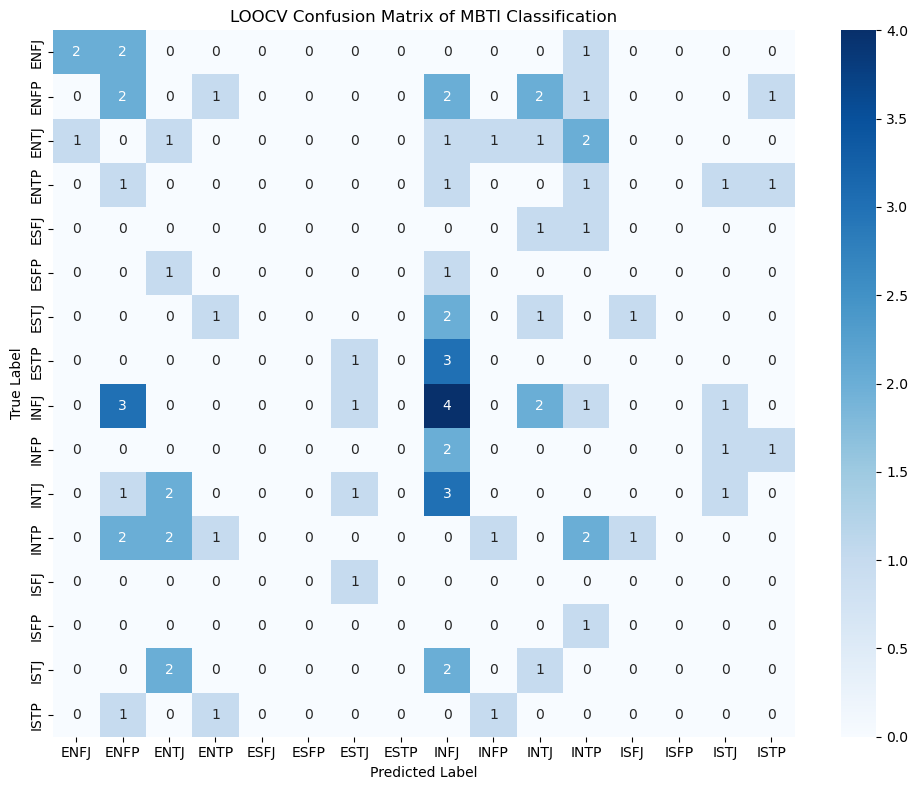

In [23]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def mbti_similarity_score(true_type, predicted_type):
    return sum(t == p for t, p in zip(true_type, predicted_type)) / 4

loo = LeaveOneOut()
y_true = []
y_pred = []
similarity_scores = []

X_labeled = preprocessor.fit_transform(labeled_df)
y_labeled = labeled_df['mbti_type'].values

for train_index, test_index in loo.split(X_labeled):
    X_train, X_test = X_labeled[train_index], X_labeled[test_index]
    y_train, y_test = y_labeled[train_index], y_labeled[test_index]
    
    clf = SelfTrainingClassifier(RandomForestClassifier())
    clf.fit(X_train, y_train)
    
    prediction = clf.predict(X_test)[0]
    y_pred.append(prediction)
    y_true.append(y_test[0])
    
    # Compute and store similarity score
    similarity_scores.append(mbti_similarity_score(y_test[0], prediction))

# Output
print("Average MBTI similarity score (0-1):", np.mean(similarity_scores))

# Optionally still show full classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

labels = np.unique(y_labeled)
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('LOOCV Confusion Matrix of MBTI Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


# Confusion matrix

In [24]:
import pandas as pd

# Create a DataFrame of results
results_df = pd.DataFrame({
    'true': y_true,
    'pred': y_pred,
    'similarity': similarity_scores
})

# Group by true MBTI type and calculate average similarity
grouped_scores = results_df.groupby('true')['similarity'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

print("\nAverage Similarity Score by True MBTI Type:")
print(grouped_scores)



Average Similarity Score by True MBTI Type:
          mean  count
true                 
ENFJ  0.750000      5
INFJ  0.687500     12
INTJ  0.656250      8
INTP  0.638889      9
ENTJ  0.607143      7
INFP  0.562500      4
ENFP  0.555556      9
ISTJ  0.550000      5
ENTP  0.500000      5
ISFJ  0.500000      1
ISFP  0.500000      1
ISTP  0.416667      3
ESTJ  0.400000      5
ESFP  0.250000      2
ESTP  0.187500      4
ESFJ  0.125000      2


/var/folders/88/zqbc622x5tb8f2bkxq6dd4h00000gn/T/ipykernel_26144/1729014357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_scores.index, y=grouped_scores['mean'], palette='viridis')


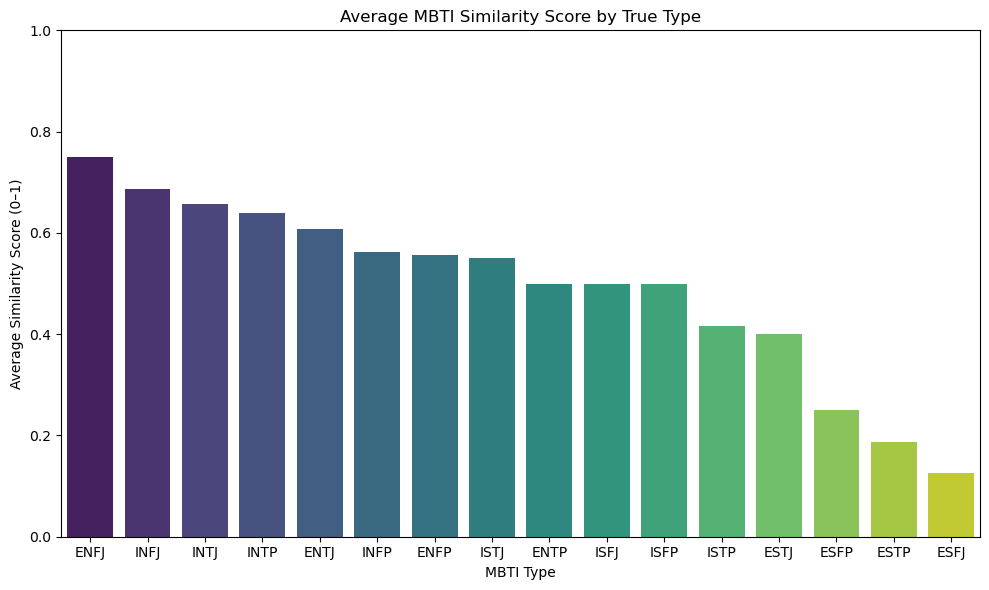

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_scores.index, y=grouped_scores['mean'], palette='viridis')
plt.title('Average MBTI Similarity Score by True Type')
plt.ylabel('Average Similarity Score (0–1)')
plt.xlabel('MBTI Type')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
